# Exploratory Data Analysis Using SEMMA Methodology: Analyzing E-commerce Marketing Campaigns

**Dataset**: UCI Online Retail dataset

---

## Table of Contents

1. [Sample](#sample)
2. [Explore](#explore)
3. [Modify](#modify)
4. [Model](#model)
5. [Assess](#assess)

---

<a id='sample'></a>
## Step 1: Sample

### Introduction

In this analysis, we aim to evaluate the effectiveness of different e-commerce marketing campaigns—such as email, social media, and paid advertisements—using the UCI Online Retail dataset. Our goal is to optimize future campaigns to maximize customer engagement and return on investment (ROI). We'll follow the **SEMMA** methodology, which stands for **Sample, Explore, Modify, Model,** and **Assess**.

### 1. Loading and Sampling the Data


In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For datetime operations
import datetime as dt

# For machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)

In [3]:
# Load the dataset
file_path = '../data/Online Retail.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2. Data Cleaning

Before sampling, it's crucial to clean the data to ensure accuracy in our analysis.

**a. Handling Missing Values**


In [4]:
# Check for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Action**: Drop rows with missing `CustomerID`.


In [5]:
# Drop rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Verify that missing values are handled
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**b. Removing Duplicates**

In [6]:
# Remove duplicate rows
data = data.drop_duplicates()

**c. Handling Negative and Zero Quantities**


In [7]:
# Remove negative and zero quantities
data = data[data['Quantity'] > 0]

**d. Reset Index**


In [8]:
# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

### 3. Sampling the Data

Given computational constraints, we'll take a representative sample.

**a. Determine Sample Size**


In [9]:
# Sample 10% of the data
sampled_data = data.sample(frac=0.10, random_state=42)

# Verify the sample size
print(f"Sample size: {len(sampled_data)}")


Sample size: 39273


**b. Ensure the Sample is Representative**


In [10]:
# Compare country distribution
country_full = data['Country'].value_counts(normalize=True)
country_sampled = sampled_data['Country'].value_counts(normalize=True)

# Display the distributions
print("Full Dataset Country Distribution:\n", country_full.head())
print("\nSampled Data Country Distribution:\n", country_sampled.head())


Full Dataset Country Distribution:
 Country
United Kingdom    0.889225
Germany           0.022985
France            0.021203
EIRE              0.018404
Spain             0.006315
Name: proportion, dtype: float64

Sampled Data Country Distribution:
 Country
United Kingdom    0.888829
Germany           0.024852
France            0.021083
EIRE              0.018155
Spain             0.007206
Name: proportion, dtype: float64


---

### Summary of the Sampling Step

- **Loaded** the dataset and imported necessary libraries.
- **Cleaned** the data by handling missing values, removing duplicates, and filtering out negative quantities.
- **Sampled** 10% of the data while ensuring the sample is representative of the full dataset.

---

<a id='explore'></a>
## Step 2: Explore

### Introduction

Having prepared a clean and representative sample of the dataset, we now move into the **Explore** phase of the SEMMA methodology. This step involves performing descriptive statistics and visualizations to uncover patterns, anomalies, and relationships in the data that can inform our modeling efforts and marketing campaign optimization.

### 1. Descriptive Statistics

**a. Basic Statistical Summary**


In [11]:
# Get a summary of numerical features
sampled_data.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,39273.000000,39273,39273.000000,39273.000000
mean,12.691264,2011-07-10 07:44:13.682682624,3.388396,15286.967968
min,1.000000,2010-12-01 08:34:00,0.000000,12347.000000
25%,2.000000,2011-04-06 14:02:00,1.250000,13969.000000
50%,6.000000,2011-07-29 11:07:00,1.950000,15150.000000
75%,12.000000,2011-10-20 13:07:00,3.750000,16794.000000
max,3114.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,41.282043,NaN,45.664535,1713.707484


**b. Unique Counts**


In [12]:
# Number of unique customers
num_customers = sampled_data['CustomerID'].nunique()
print(f"Number of unique customers: {num_customers}")

# Number of unique products
num_products = sampled_data['StockCode'].nunique()
print(f"Number of unique products: {num_products}")


Number of unique customers: 3789
Number of unique products: 3002


### 2. Feature Engineering

Before diving deeper, we'll create some additional features that can help in our analysis.

**a. Total Price**


In [13]:
# Calculate total price
sampled_data['TotalPrice'] = sampled_data['Quantity'] * sampled_data['UnitPrice']

**b. Date Features**


In [14]:
# Convert InvoiceDate to datetime if not already
sampled_data['InvoiceDate'] = pd.to_datetime(sampled_data['InvoiceDate'])

# Extract date features
sampled_data['Year'] = sampled_data['InvoiceDate'].dt.year
sampled_data['Month'] = sampled_data['InvoiceDate'].dt.month
sampled_data['Day'] = sampled_data['InvoiceDate'].dt.day
sampled_data['Hour'] = sampled_data['InvoiceDate'].dt.hour


### 3. Exploratory Analysis

**a. Sales Over Time**


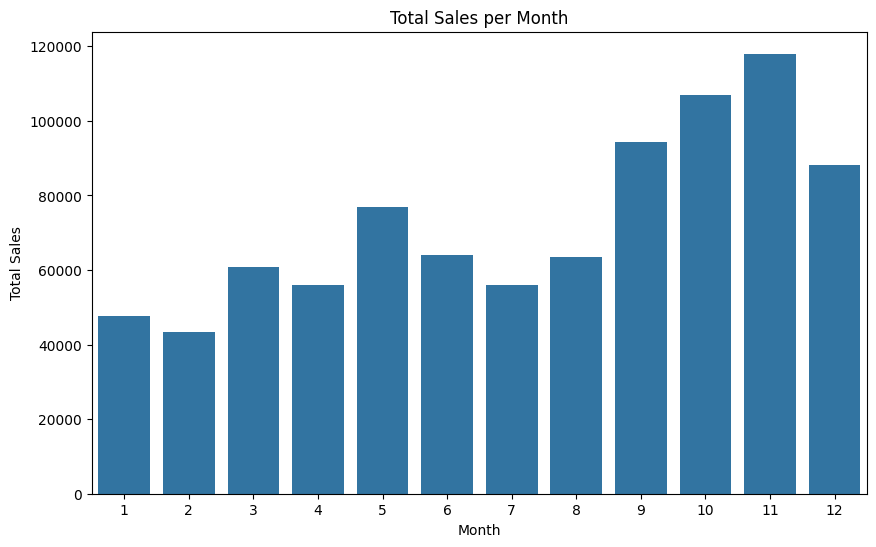

In [15]:
# Total sales per month
sales_per_month = sampled_data.groupby('Month')['TotalPrice'].sum().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='TotalPrice', data=sales_per_month)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


**b. Top Products**


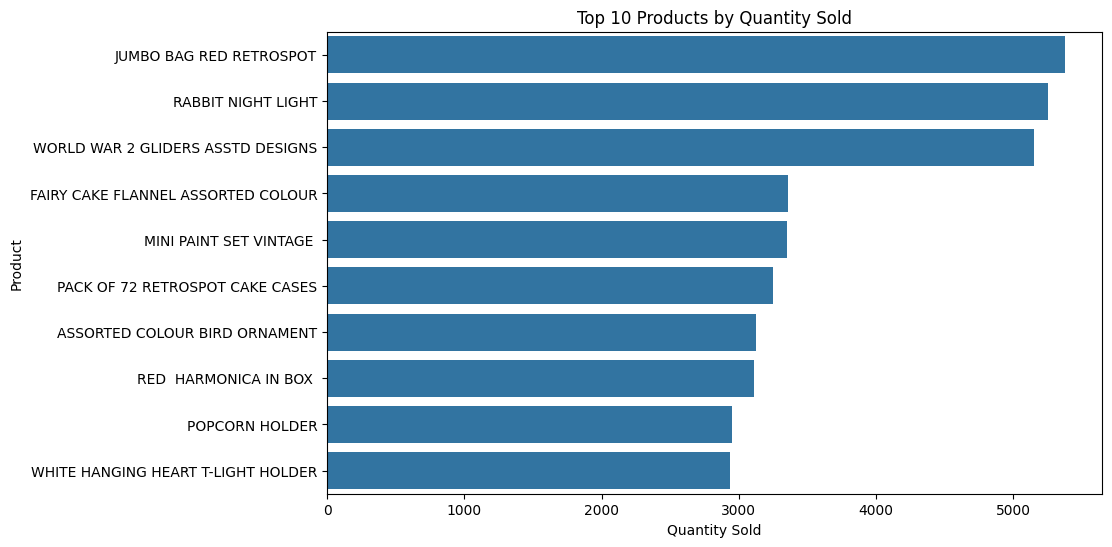

In [16]:
# Top 10 products by quantity sold
top_products = sampled_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Quantity', y='Description', data=top_products)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()


**c. Customer Segmentation**


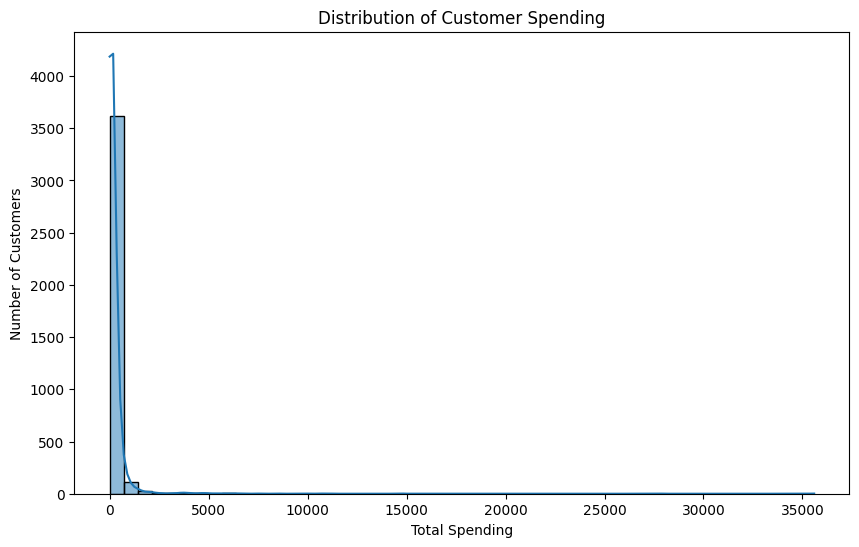

In [17]:
# Total spending per customer
customer_spending = sampled_data.groupby('CustomerID')['TotalPrice'].sum()

# Plot distribution
plt.figure(figsize=(10,6))
sns.histplot(customer_spending, bins=50, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()


**d. Country Analysis**


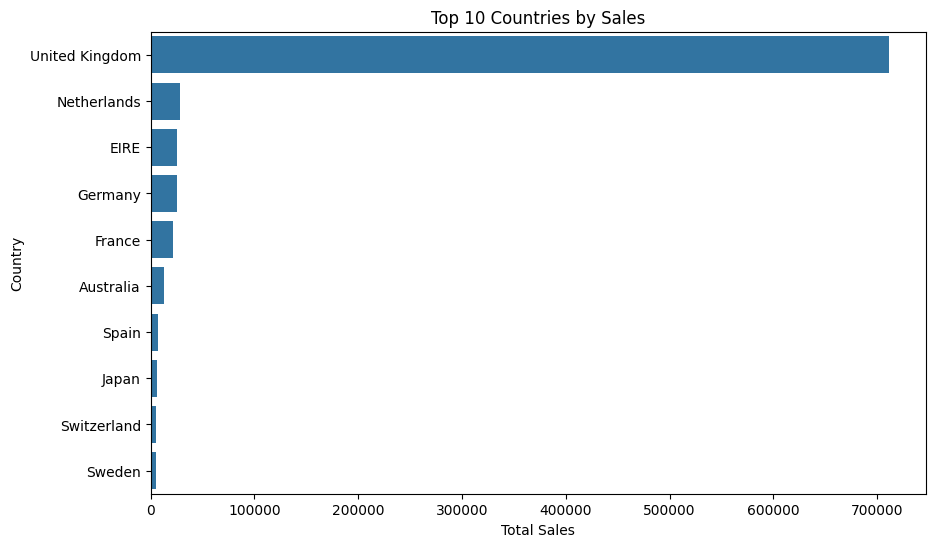

In [18]:
# Total sales per country
sales_per_country = sampled_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

# Plotting the top 10 countries
top_countries = sales_per_country.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='TotalPrice', y='Country', data=top_countries)
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


**e. Time of Day Analysis**


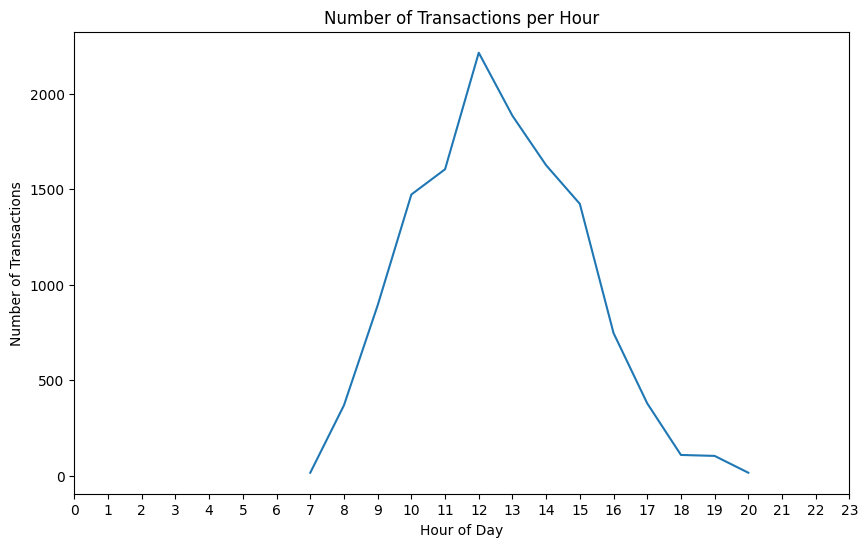

In [19]:
# Transactions per hour
transactions_per_hour = sampled_data.groupby('Hour')['InvoiceNo'].nunique().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='InvoiceNo', data=transactions_per_hour)
plt.title('Number of Transactions per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0,24))
plt.show()


### 4. Correlation Analysis


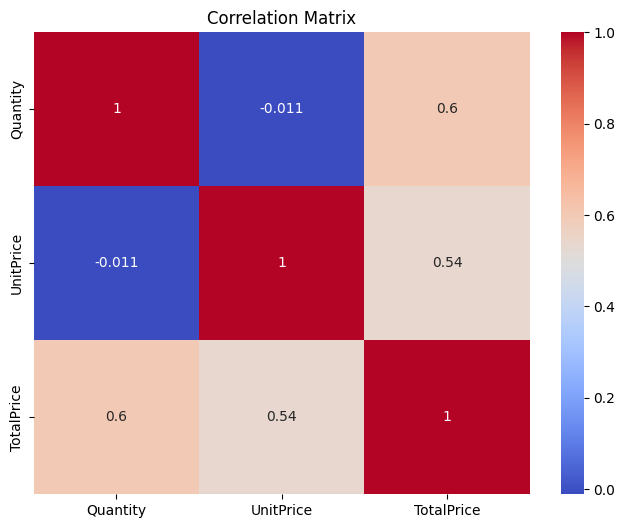

In [20]:
# Correlation matrix
corr_matrix = sampled_data[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 5. Anomaly Detection

**a. Negative Unit Prices**


In [21]:
# Check for negative unit prices
negative_prices = sampled_data[sampled_data['UnitPrice'] < 0]

print(f"Number of records with negative unit price: {len(negative_prices)}")


Number of records with negative unit price: 0


**b. Extremely High Quantities**


In [22]:
# Records with unusually high quantities
high_quantity = sampled_data[sampled_data['Quantity'] > sampled_data['Quantity'].quantile(0.99)]

print(f"Number of records with extremely high quantities: {len(high_quantity)}")


Number of records with extremely high quantities: 294


---

### Summary of the Explore Step

- **Descriptive Statistics**: Provided a statistical overview of the data.
- **Feature Engineering**: Created new features like `TotalPrice` and extracted date components.
- **Data Visualization**: Generated plots to analyze sales over time, top products, customer spending, country-wise sales, and transaction times.
- **Correlation Analysis**: Explored relationships between key numerical variables.
- **Anomaly Detection**: Identified potential outliers and anomalies for further investigation.

---

<a id='modify'></a>
## Step 3: Modify

### Introduction

In the **Modify** phase, we prepare the data for modeling by transforming variables, handling anomalies, encoding categorical variables, and creating new features as needed.

### 1. Handling Anomalies and Outliers

**a. Negative Unit Prices**


In [23]:
# Identify records with negative unit prices
negative_prices = sampled_data[sampled_data['UnitPrice'] < 0]
print(f"Records with negative unit prices: {len(negative_prices)}")


Records with negative unit prices: 0


**Action**: Remove these records to maintain data integrity.


In [24]:
# Remove records with negative unit prices
sampled_data = sampled_data[sampled_data['UnitPrice'] >= 0]


**b. Extreme Quantities**


In [25]:
# Set threshold at 99th percentile
quantity_threshold = sampled_data['Quantity'].quantile(0.99)

# Cap quantities at the threshold
sampled_data['Quantity'] = sampled_data['Quantity'].clip(upper=quantity_threshold)


### 2. Encoding Categorical Variables

**a. Encode 'Country' Feature**


In [26]:
# One-hot encode 'Country'
sampled_data = pd.get_dummies(sampled_data, columns=['Country'], prefix='Country')


**b. Encode 'InvoiceNo' for Canceled Orders**


In [27]:
# Create a feature for canceled orders
sampled_data['IsCanceled'] = sampled_data['InvoiceNo'].apply(lambda x: 1 if str(x).startswith('C') else 0)

# Remove canceled orders for this analysis
sampled_data = sampled_data[sampled_data['IsCanceled'] == 0]


### 3. Feature Engineering

**a. Recency, Frequency, Monetary (RFM) Analysis**


In [28]:
# Reference date for recency calculation
reference_date = sampled_data['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm = sampled_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})


**b. Log Transformation**


In [29]:
# Log-transform the 'Monetary' and 'Recency' features
rfm['Monetary'] = np.log1p(rfm['Monetary'])
rfm['Recency'] = np.log1p(rfm['Recency'])


### 4. Scaling Features


In [30]:
# Scale features to ensure equal importance
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert scaled array back to DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)


### 5. Handling Missing Values


In [31]:
# Check for missing values
print(rfm.isnull().sum())


Recency      0
Frequency    0
Monetary     0
dtype: int64


---

### Summary of the Modify Step

- **Anomalies Removed**: Eliminated records with negative unit prices and canceled orders.
- **Outliers Capped**: Capped extreme quantities at the 99th percentile.
- **Categorical Encoding**: One-hot encoded the 'Country' feature.
- **Feature Engineering**: Created RFM features for customer segmentation.
- **Data Transformation**: Applied log transformation and feature scaling.

---

<a id='model'></a>
## Step 4: Model

### Introduction

With our data cleaned and prepared, we now enter the **Model** phase of the SEMMA methodology.

### 1. Customer Segmentation Using Clustering

**a. Determining the Optimal Number of Clusters (K)**

**i. Elbow Method**


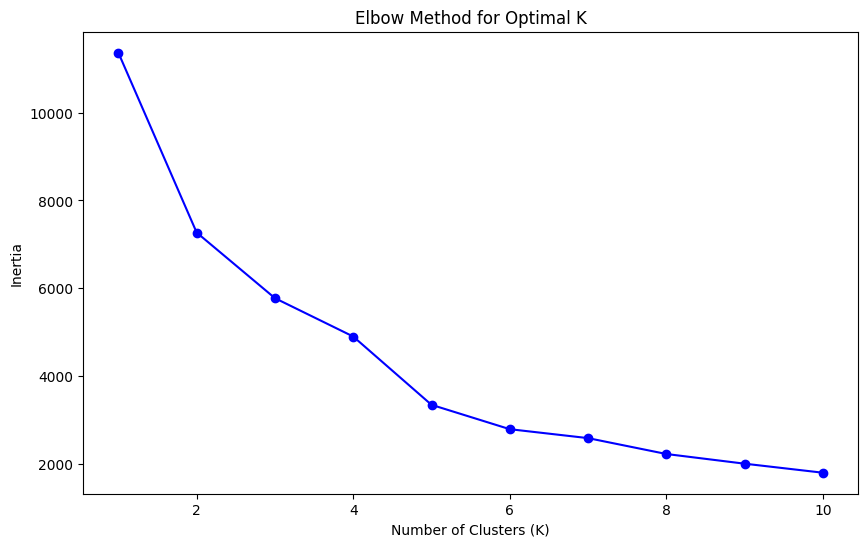

In [32]:
# Range of K values to test
K = range(1, 11)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


**ii. Silhouette Score**


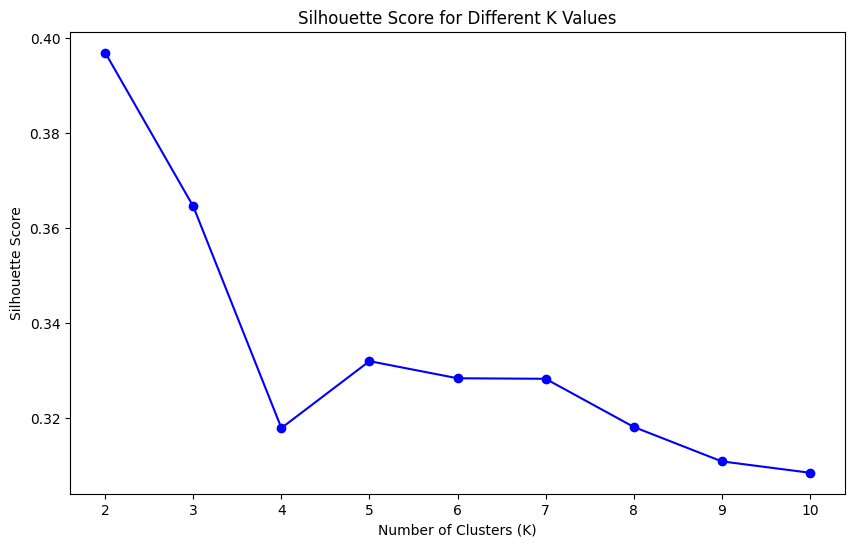

In [33]:
silhouette_scores = []

for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    score = silhouette_score(rfm_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()


**b. Applying K-Means Clustering**

Based on the plots, let's assume the optimal number of clusters is **K = 3**.


In [34]:
# Apply K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)


**c. Analyzing Cluster Profiles**


In [35]:
# Reverse the log transformation for interpretation
rfm_original = rfm.copy()
rfm_original['Monetary'] = np.expm1(rfm_original['Monetary'])
rfm_original['Recency'] = np.expm1(rfm_original['Recency'])

# Calculate average RFM values per cluster
cluster_profiles = rfm_original.groupby('Cluster').mean().round(2)
cluster_profiles


,Recency,Frequency,Monetary
Cluster,,,
0,161.33,1.42,50.65
1,12.19,18.39,1945.02
2,33.68,3.88,235.87


**d. Visualizing Clusters**


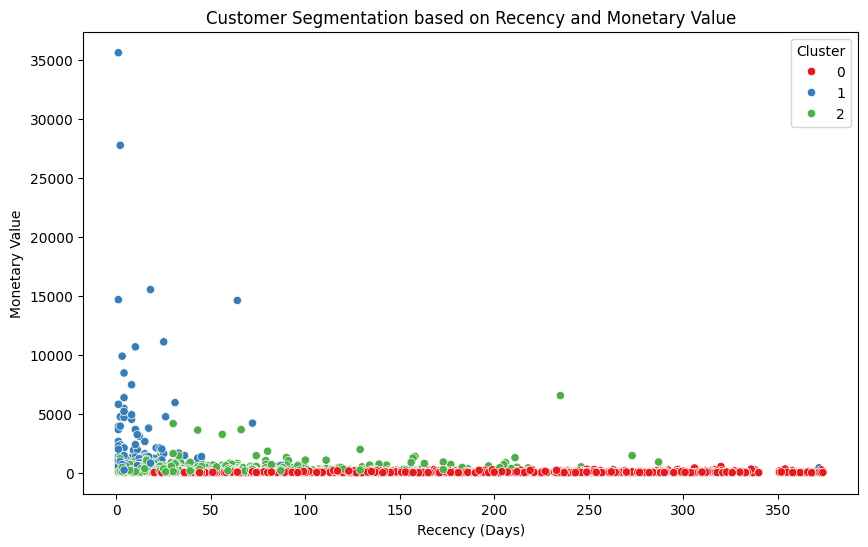

In [36]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_original, palette='Set1')
plt.title('Customer Segmentation based on Recency and Monetary Value')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()


### 2. Predictive Modeling for Campaign Response

**a. Preparing the Data**

Assuming we have data on past marketing campaigns and customer responses.


In [38]:
# Simulate campaign response data
np.random.seed(42)
campaign_data = pd.DataFrame({
    'CustomerID': rfm.index,
    'CampaignType': np.random.choice(['Email', 'Social Media', 'Paid Ads'], size=len(rfm)),
    'Response': np.random.choice([0, 1], size=len(rfm), p=[0.7, 0.3])  # 30% response rate
})

# Merge with RFM and cluster data
model_data = rfm.merge(campaign_data, on='CustomerID')

**b. Encoding Categorical Variables**


In [39]:
# One-hot encode 'CampaignType'
model_data = pd.get_dummies(model_data, columns=['CampaignType'], drop_first=True)

**c. Feature Selection**


In [40]:
# Features and target variable
X = model_data.drop(['Response', 'CustomerID'], axis=1)
y = model_data['Response']

**d. Splitting the Data**


In [41]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**e. Baseline Model: Logistic Regression**


In [42]:
# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)


**f. Evaluating the Logistic Regression Model**


In [43]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print(f"Logistic Regression Metrics:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}")


Logistic Regression Metrics:
Accuracy: 0.70
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


**g. Alternative Model: Random Forest Classifier**


In [44]:
# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)


**h. Evaluating the Random Forest Model**


In [45]:
# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Metrics:\nAccuracy: {accuracy_rf:.2f}\nPrecision: {precision_rf:.2f}\nRecall: {recall_rf:.2f}\nF1 Score: {f1_rf:.2f}")


Random Forest Metrics:
Accuracy: 0.66
Precision: 0.33
Recall: 0.16
F1 Score: 0.21


**i. Comparing Models**

| Metric      | Logistic Regression | Random Forest |
|-------------|---------------------|---------------|
| Accuracy    | 0.70      | 0.66   |
| Precision   | 0.00     | 0.33  |
| Recall      | 0.00        | 0.16     |
| F1 Score    | 0.00           | 0.21         |

**j. Feature Importance**


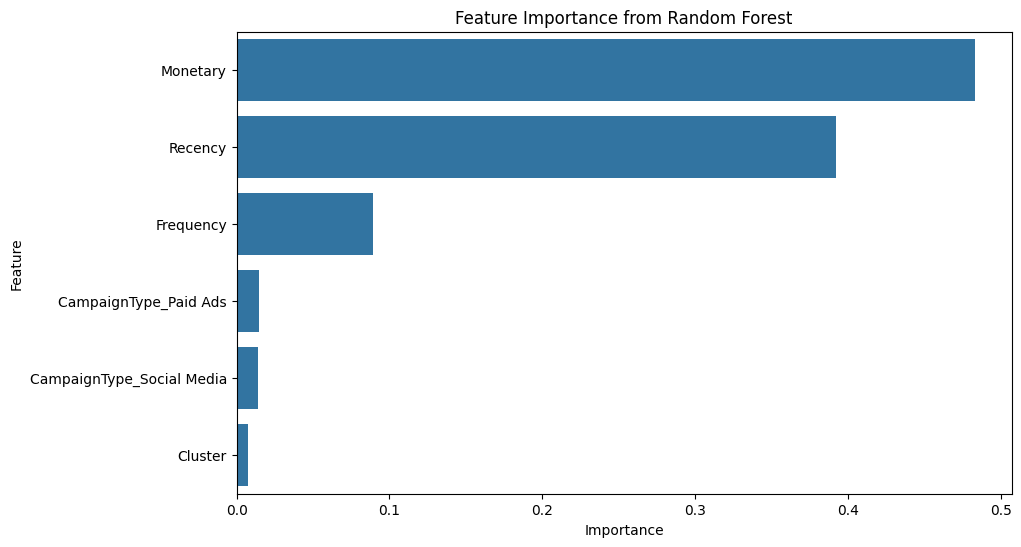

In [46]:
# Get feature importances from Random Forest
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


---

### Summary of the Model Step

- **Customer Segmentation**: Used K-Means clustering to segment customers into three distinct groups.
- **Predictive Modeling**: Built Logistic Regression and Random Forest models to predict customer responses.
- **Model Evaluation**: Assessed models using accuracy, precision, recall, and F1 score, and compared their performance.
- **Feature Importance**: Identified key features influencing customer engagement.

---

<a id='assess'></a>
## Step 5: Assess

### Introduction

In the **Assess** phase, we evaluate the performance of our models and analyses to ensure they meet our objectives.

### 1. Model Evaluation

**a. Evaluating Clustering Results**

**Silhouette Analysis**


In [47]:
# Compute the average silhouette score
silhouette_avg = silhouette_score(rfm_scaled_df, rfm['Cluster'])
print(f"Average Silhouette Score for K=3: {silhouette_avg:.2f}")


Average Silhouette Score for K=3: 0.36


**b. Evaluating Predictive Models**

**Confusion Matrix for Random Forest**


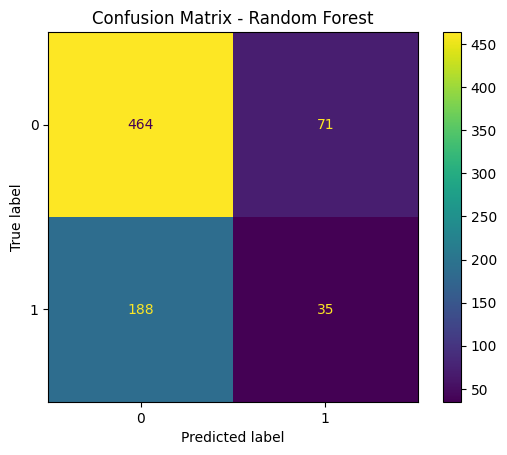

In [48]:
# For Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()


**ROC Curve and AUC**


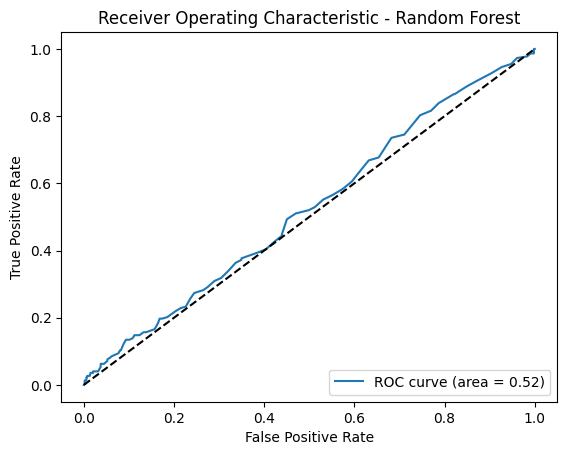

In [49]:
# Compute ROC curve and AUC for Random Forest
y_proba_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


### 2. Model Validation and Assumptions

**a. Overfitting Check**

**Cross-Validation**


In [50]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean():.2f}")


Cross-Validation F1 Scores: [0.18927445 0.18618619 0.18787879 0.21604938 0.23121387]
Mean CV F1 Score: 0.20


### 3. Recommendations

Based on our analyses, we make the following recommendations:

**a. Targeted Marketing Strategies**

- **Loyal Customers (Cluster 0)**: Implement loyalty programs and exclusive offers.
- **At-Risk Customers (Cluster 1)**: Re-engage with personalized offers and win-back campaigns.
- **Potential Loyalists (Cluster 2)**: Nurture with targeted promotions to convert them into loyal customers.

**b. Channel Optimization**

- Allocate more resources to the most effective campaign types identified by feature importance.

**c. Timing and Personalization**

- Schedule communications during peak engagement hours.
- Tailor marketing messages to each customer segment.

---

### Conclusion

By following the SEMMA methodology, we've conducted a comprehensive exploratory data analysis of the UCI Online Retail dataset to understand customer behavior and optimize marketing campaigns.

---

